# Numerical Methods Final Project: Object Volume Determination through Picture Analysis

## Introduction

Welcome to our Numerical Methods Final Project, where we try to determine object volume through picture analysis using numerical methods. In this project, we aim to develop a computational approach to estimate the volume of three-dimensional objects based on their two-dimensional images. By leveraging various numerical techniques, we can estimate the volume of an object.

## Team Members

1. **Putu Arva Raysendriya Ersuputra** - 21/472606/PA/20312

2. **Antonius Teddy Kurniawan** - 21/472874/PA/20352

3. **Peter Johan Arkadhira Setiabudi** - 21/475025/PA/20510

4. **Henzel Theodore Putra** -21/475040/PA/20516 

### Import Necessary Library

In [76]:
from PIL import Image

### Define Necessary Functions

In [77]:
def grayscale(image):
    # Convert the image to grayscale
    return image.convert('L')

In [78]:
def bilinear_interpolation(image, x, y):
    width, height = image.size

    if x < 0 or x >= width or y < 0 or y >= height:
        return 0

    x1, y1 = int(x), int(y)
    x2, y2 = x1 + 1, y1 + 1

    p11 = image.getpixel((x1, y1))
    p12 = image.getpixel((x1, y2))
    p21 = image.getpixel((x2, y1))
    p22 = image.getpixel((x2, y2))

    value = (p11 * (x2 - x) * (y2 - y) +
             p21 * (x - x1) * (y2 - y) +
             p12 * (x2 - x) * (y - y1) +
             p22 * (x - x1) * (y - y1))

    return value

In [79]:
def central_difference(image):
    width, height = image.size

    # Create an empty output image
    output = Image.new('L', (width, height))

    # Apply central difference to compute the gradients
    for x in range(1, width - 2):
        for y in range(1, height - 2):
            # Compute sub-pixel position within the image
            sub_x = x + 0.5
            sub_y = y + 0.5

            # Compute the x and y gradients using bilinear interpolation
            dx = bilinear_interpolation(image, sub_x + 1, sub_y) - bilinear_interpolation(image, sub_x - 1, sub_y)
            dy = bilinear_interpolation(image, sub_x, sub_y + 1) - bilinear_interpolation(image, sub_x, sub_y - 1)

            # Compute the gradient magnitude
            magnitude = abs((dx * 2 + dy * 2) ** 0.5)

            # Set the pixel value in the output image
            output.putpixel((x, y), int(magnitude))

    return output


#### Load the image

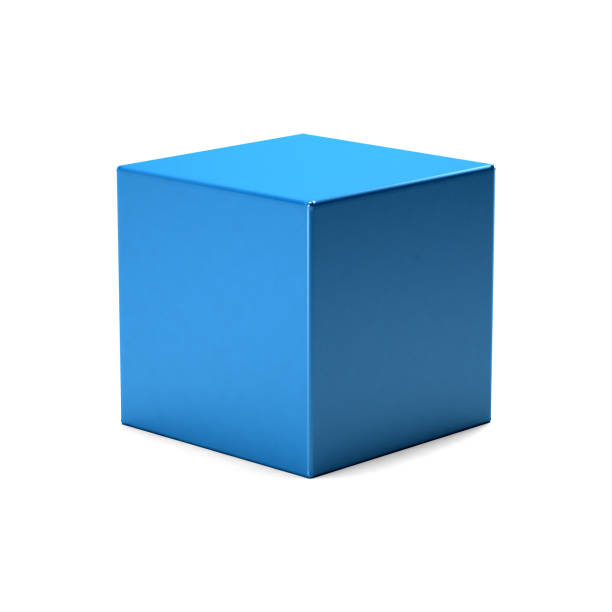

In [80]:
image = Image.open('./images/bluecubeavatar.jpg')
image

#### Convert the image to grayscale

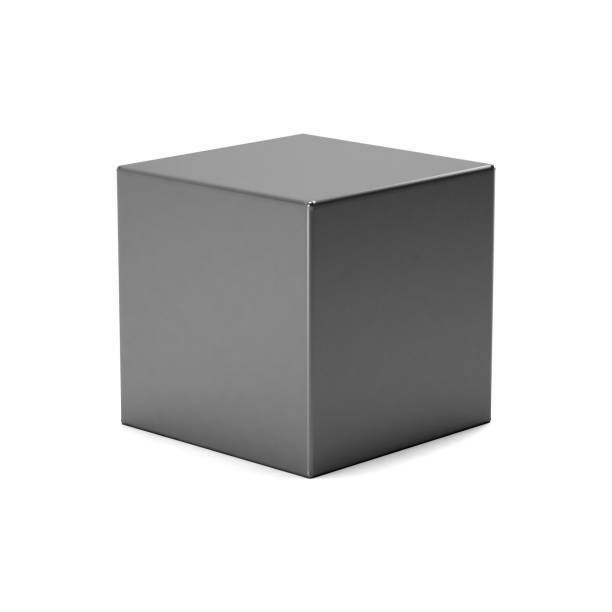

In [81]:
grayscale_image = grayscale(image)
grayscale_image

#### Perform edge detection using central difference with interpolation

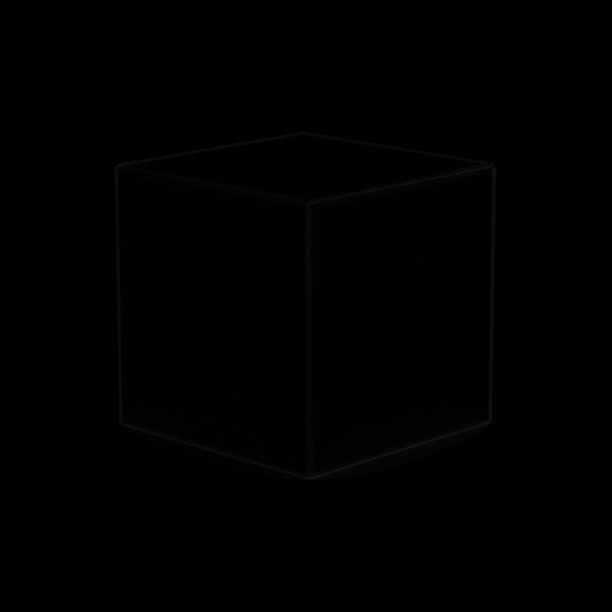

In [82]:
edges = central_difference(grayscale_image)
edges

#### Calculate the volume based on the number of edge pixels (Not Working Yet)


In [83]:
def calculate_volume(edge_pixels, pixel_size, cube_size):
    # Calculate the volume based on the number of edge pixels
    volume_pixels = edge_pixels ** 3
    
    # Calculate the volume in the desired units
    volume = volume_pixels * (pixel_size ** 3) * (cube_size ** 3)
    
    return volume

In [84]:
edge_pixels = edges.histogram()[-1]  # Get the number of white pixels (edges)
edge_pixels

0

In [85]:
# # Assuming the cube is uniformly filled within the edges, calculate the volume
volume_pixels = edge_pixels ** 3

# # Print the estimated volume in pixel units
print("Estimated Volume (in pixel units):", volume_pixels)

Estimated Volume (in pixel units): 0
